In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Acquisition

In [17]:
data = pd.read_csv('rating.csv')
data.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [18]:
anime = pd.read_csv('anime.csv')
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [19]:
data = pd.merge(data,anime.drop('rating',axis=1),on='anime_id')

In [20]:
data.head()

,user_id,anime_id,rating,name,genre,type,episodes,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,683297


Data Exploration

In [21]:
data.shape

(7813727, 8)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813727 entries, 0 to 7813726
Data columns (total 8 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   anime_id  int64 
 2   rating    int64 
 3   name      object
 4   genre     object
 5   type      object
 6   episodes  object
 7   members   int64 
dtypes: int64(4), object(4)
memory usage: 536.5+ MB


In [24]:
data.describe()

,user_id,anime_id,rating,members
count,7.813727e+06,7.813727e+06,7.813727e+06,7.813727e+06
mean,3.672795e+04,8.909045e+03,6.144036e+00,1.786208e+05
std,2.099795e+04,8.883923e+03,3.727796e+00,1.881764e+05
min,1.000000e+00,1.000000e+00,-1.000000e+00,2.900000e+01
25%,1.897400e+04,1.240000e+03,6.000000e+00,4.403000e+04
50%,3.679100e+04,6.213000e+03,7.000000e+00,1.104700e+05
75%,5.475700e+04,1.409300e+04,9.000000e+00,2.442680e+05
max,7.351600e+04,3.451900e+04,1.000000e+01,1.013917e+06


In [25]:
data.isnull().sum()

user_id       0
anime_id      0
rating        0
name          0
genre       110
type          4
episodes      0
members       0
dtype: int64

In [26]:
data = data.dropna()
data.shape

(7813613, 8)

In [30]:
data.groupby('name')['rating'].count().sort_values(ascending=False).head(10)

name
Death Note                          39340
Sword Art Online                    30583
Shingeki no Kyojin                  29584
Code Geass: Hangyaku no Lelouch     27718
Elfen Lied                          27506
Angel Beats!                        27183
Naruto                              25925
Fullmetal Alchemist                 25032
Fullmetal Alchemist: Brotherhood    24574
Toradora!                           24283
Name: rating, dtype: int64

In [31]:
data.groupby('name')['rating'].mean().sort_values(ascending=False).head(10)

name
STAR BEAT!: Hoshi no Kodou                                          10.000000
Warui no wo Taose!! Salaryman Man                                   10.000000
Choegang Top Plate                                                  10.000000
Shiroi Zou                                                          10.000000
Yakushiji Ryouko no Kaiki Jikenbo: Hamachou, Voice &amp; Fiction     9.000000
Shiranpuri                                                           9.000000
Tang Lang Bu Chan                                                    9.000000
Doukyuusei                                                           9.000000
Kimi no Na wa.                                                       8.297863
Ginga Eiyuu Densetsu                                                 8.239203
Name: rating, dtype: float64

In [39]:
data.duplicated().sum()

1

In [40]:
data['genre'].value_counts()

Hentai                                                        62435
Comedy, School, Slice of Life                                 61404
Comedy                                                        54154
Comedy, Slice of Life                                         52569
Action, Adventure, Fantasy, Game, Romance                     50051
                                                              ...  
Adventure, Drama, Military                                        1
Action, Adventure, Comedy, Fantasy, Mecha, Sci-Fi, Shounen        1
Adventure, Comedy, Kids, Super Power                              1
Action, Comedy, Kids, Sci-Fi                                      1
Action, Historical, Kids                                          1
Name: genre, Length: 3154, dtype: int64

In [41]:
data['type'].value_counts()

TV         5283596
Movie      1051911
OVA         800307
Special     559347
ONA          91952
Music        26500
Name: type, dtype: int64

Exploratory Data Analysis

In [32]:
ratings = pd.DataFrame(data.groupby('name')['rating'].mean())
ratings['num of ratings'] = pd.DataFrame(data.groupby('name')['rating'].count())

In [33]:
genre_dict = pd.DataFrame(data=anime[['name','genre']])
genre_dict.set_index('name',inplace=True)

In [34]:
ratings.head()

,rating,num of ratings
name,,
&quot;0&quot;,2.769231,26
"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",0.000000,2
&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,5.774936,782
&quot;Bungaku Shoujo&quot; Memoire,6.155748,809
&quot;Bungaku Shoujo&quot; Movie,6.457980,1535


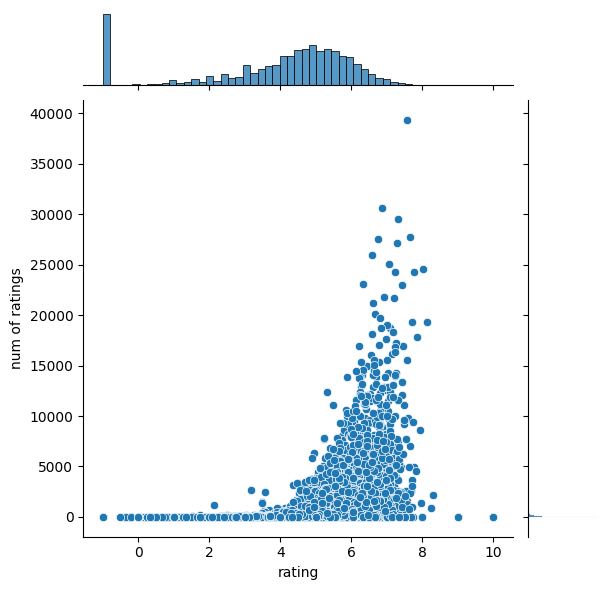

In [36]:
sns.jointplot(x='rating',y='num of ratings',data=ratings)

Simple Function Recommendation

In [42]:
def check_genre(genre_list, string):
    if any(x in string for x in genre_list):
        return True
    else:
        return False

def get_recom(name):
    anime_genre = genre_dict.loc[name].values[0].split(', ')
    cols = anime[anime['genre'].apply(lambda x: check_genre(anime_genre, str(x)))]['name'].tolist()
    animemat = data[data['name'].isin(cols)].pivot_table(index='user_id', columns='name', values='rating')
    anime_user_rating = animemat[name]
    
    similiar_anime = animemat.corrwith(anime_user_rating)
    corr_anime = pd.DataFrame(similiar_anime,columns=['correlation'])
    corr_anime = corr_anime.join(ratings['num of ratings'])
    corr_anime.dropna(inplace=True)
    corr_anime = corr_anime[corr_anime['num of ratings']>5000].sort_values('correlation',ascending=False)
    
    return corr_anime.head(10)

Testing Recommendation

In [43]:
get_recom('Kimi no Na wa.')

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,num of ratings
name,,
Beelzebub,0.710506,5871
Amagami SS,0.705351,5497
Bakuman. 2nd Season,0.677092,6164
Re:Zero kara Hajimeru Isekai Seikatsu,0.671666,6123
Boku no Hero Academia,0.669247,6034
Shigatsu wa Kimi no Uso,0.667975,9448
Dance in the Vampire Bund,0.667899,5174
Princess Lover!,0.665735,5005
Eureka Seven,0.665077,7851


In [44]:
get_recom('Naruto')

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


,correlation,num of ratings
name,,
Naruto,1.000000,25925
Bleach,0.720531,12845
InuYasha,0.704638,9328
Shaman King,0.696407,7814
Katekyo Hitman Reborn!,0.694202,6739
Tenjou Tenge,0.691476,5150
Sekirei,0.691413,7924
Rurouni Kenshin: Meiji Kenkaku Romantan,0.690855,7900
Shijou Saikyou no Deshi Kenichi,0.690250,5654
